# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fathur Rahman Al Farizy
- Email: fathur.alfarizy02@gmail.com
- Id Dicoding: fralfrzy

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import joblib

# Setting untuk visualisasi
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Setting tampilan pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Menyiapkan data yang akan digunakan

In [2]:
DATA_DIR = "data/"

# Muat dataset
df = pd.read_csv(DATA_DIR+'data.csv', sep=";")

print("Dataset berhasil dimuat!")
print(f"Dimensi dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Dataset berhasil dimuat!
Dimensi dataset: (4424, 37)
Jumlah baris: 4424
Jumlah kolom: 37


## Data Understanding

In [3]:
# Tinjauan umum dataset
print("="*50)
print("TINJAUAN UMUM DATASET")
print("="*50)

print("\n1. Informasi Dataset:")
df.info()

print("\n2. Statistik Deskriptif:")
df.describe()

TINJAUAN UMUM DATASET

1. Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualificat

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [4]:
# Cek nilai yang hilang
print("\n3. Nilai yang Hilang:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Jumlah Hilang': missing_values,
    'Persentase': missing_percentage
})
missing_df = missing_df[missing_df['Jumlah Hilang'] > 0].sort_values('Jumlah Hilang', ascending=False)
print(missing_df)

if len(missing_df) == 0:
    print("Tidak ada nilai yang hilang dalam dataset.")


3. Nilai yang Hilang:
Empty DataFrame
Columns: [Jumlah Hilang, Persentase]
Index: []
Tidak ada nilai yang hilang dalam dataset.



4. Distribusi Variabel Target (Status):
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Persentase:
Status
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: count, dtype: float64


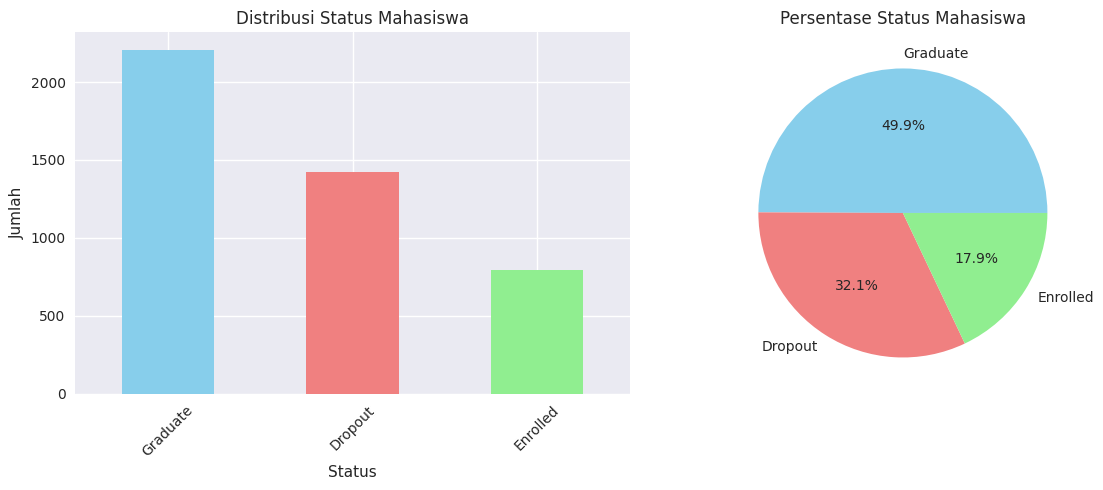

In [5]:
# Distribusi variabel target
print("\n4. Distribusi Variabel Target (Status):")
target_distribution = df['Status'].value_counts()
print(target_distribution)
print("\nPersentase:")
print((target_distribution / len(df) * 100).round(2))

# Visualisasi distribusi target
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df['Status'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Persentase Status Mahasiswa')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [6]:
# Analisis fitur numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Status' in numeric_cols:
    numeric_cols.remove('Status')

print(f"\n5. Fitur Numerik ({len(numeric_cols)} kolom):")
print(numeric_cols[:10])  # Tampilkan 10 kolom pertama

# Korelasi dengan target untuk fitur numerik
# Enkode target untuk perhitungan korelasi
le_status = LabelEncoder()
df_temp = df.copy()
df_temp['Status_encoded'] = le_status.fit_transform(df_temp['Status'])

# Hitung korelasi
correlations = df_temp[numeric_cols + ['Status_encoded']].corr()['Status_encoded'].abs().sort_values(ascending=False)
print("\nTop 10 Fitur dengan Korelasi Tertinggi terhadap Status:")
print(correlations[1:11])  # Kecualikan Status_encoded itu sendiri


5. Fitur Numerik (36 kolom):
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification']

Top 10 Fitur dengan Korelasi Tertinggi terhadap Status:
Curricular_units_2nd_sem_approved    0.624157
Curricular_units_2nd_sem_grade       0.566827
Curricular_units_1st_sem_approved    0.529123
Curricular_units_1st_sem_grade       0.485207
Tuition_fees_up_to_date              0.409827
Scholarship_holder                   0.297595
Age_at_enrollment                    0.243438
Debtor                               0.240999
Gender                               0.229270
Application_mode                     0.221747
Name: Status_encoded, dtype: float64


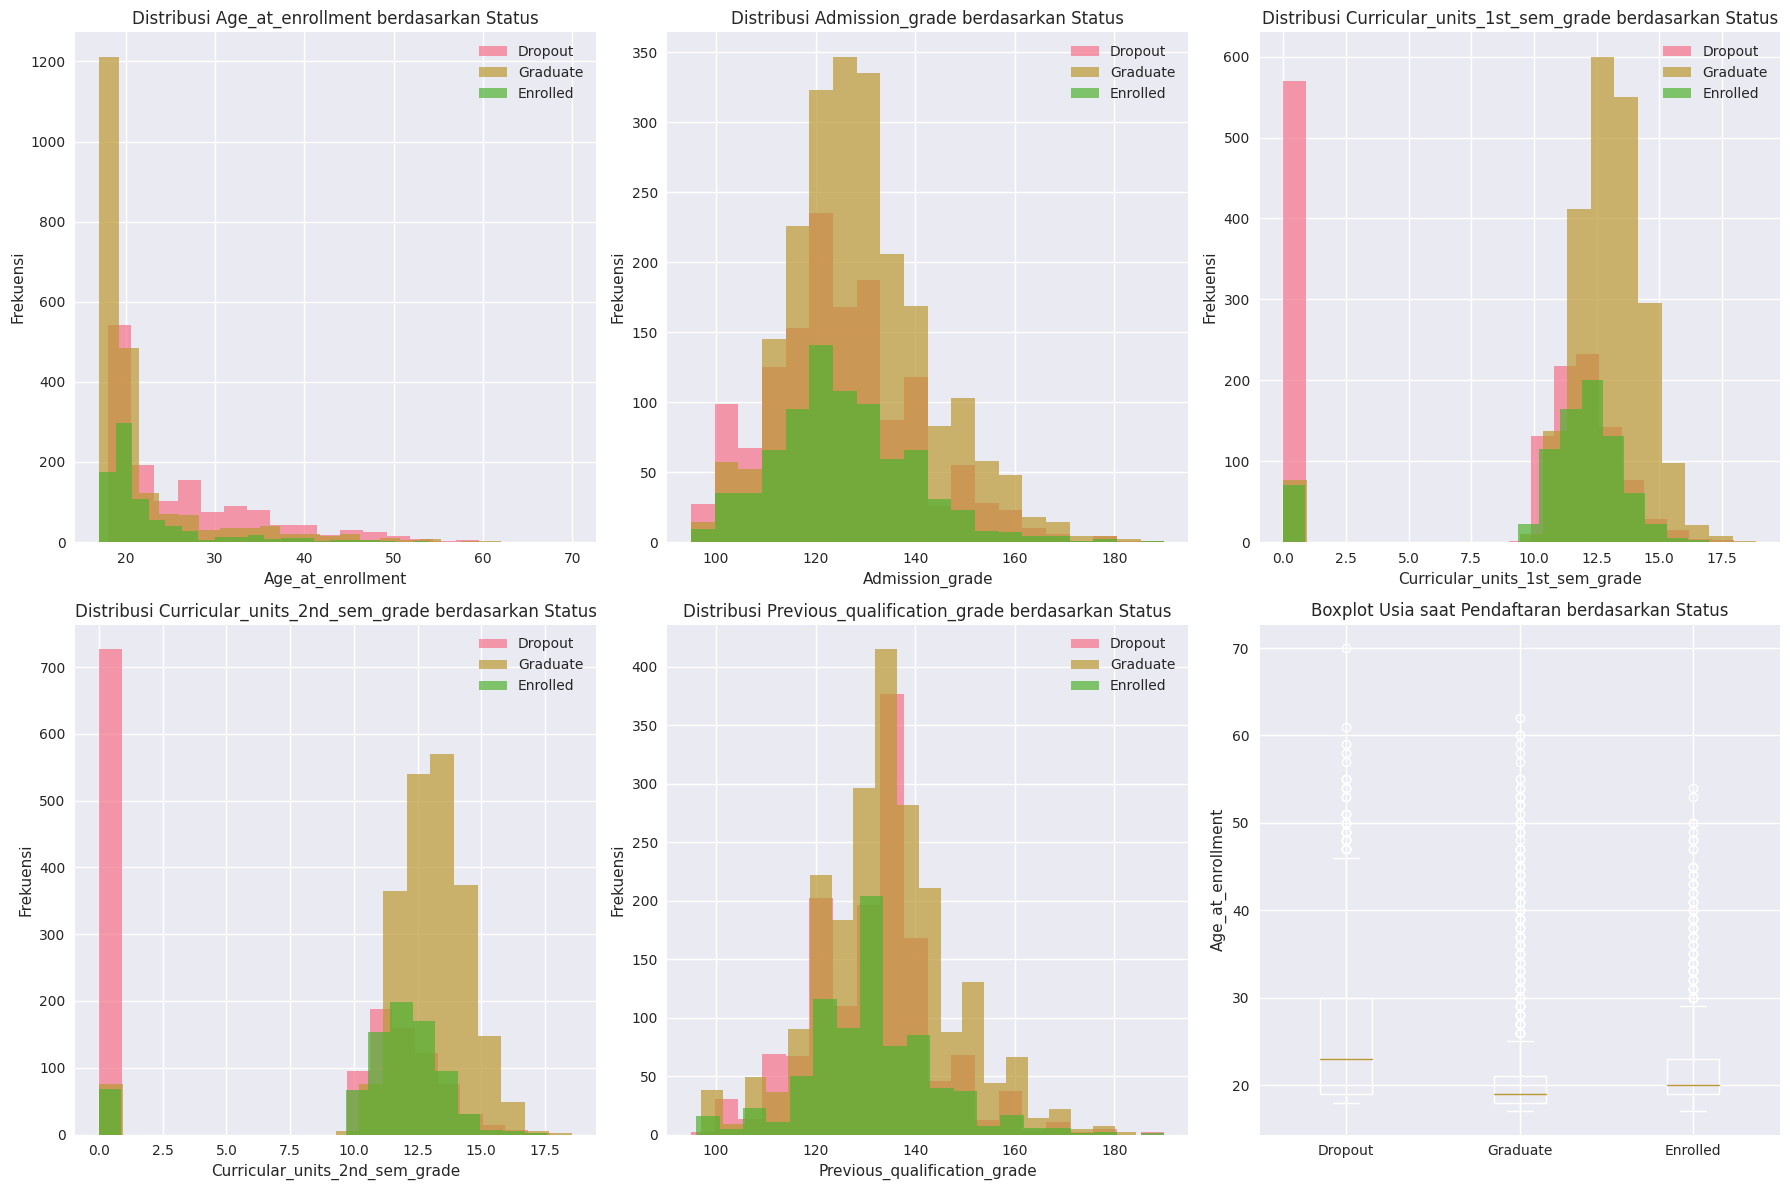

In [7]:
# Visualisasi distribusi beberapa fitur penting
important_features = ['Age_at_enrollment', 'Admission_grade', 'Curricular_units_1st_sem_grade', 
                     'Curricular_units_2nd_sem_grade', 'Previous_qualification_grade']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(important_features):
    if feature in df.columns:
        for status in df['Status'].unique():
            data = df[df['Status'] == status][feature]
            axes[i].hist(data, alpha=0.7, label=status, bins=20)
        axes[i].set_title(f'Distribusi {feature} berdasarkan Status')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frekuensi')
        axes[i].legend()

# Tambahkan plot distribusi usia
axes[5].boxplot([df[df['Status'] == status]['Age_at_enrollment'] for status in df['Status'].unique()],
                labels=df['Status'].unique())
axes[5].set_title('Boxplot Usia saat Pendaftaran berdasarkan Status')
axes[5].set_ylabel('Age_at_enrollment')

plt.tight_layout()
plt.show()

In [8]:
# Analisis fitur kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Status' in categorical_cols:
    categorical_cols.remove('Status')

print(f"\n6. Fitur Kategorikal ({len(categorical_cols)} kolom):")
print(categorical_cols)

# Analisis beberapa fitur kategorikal penting
categorical_features = ['Gender', 'Daytime_evening_attendance', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date']

for feature in categorical_features:
    if feature in df.columns:
        print(f"\nDistribusi {feature}:")
        print(pd.crosstab(df[feature], df['Status'], normalize='index') * 100)


6. Fitur Kategorikal (0 kolom):
[]

Distribusi Gender:
Status    Dropout   Enrolled   Graduate
Gender                                 
0       25.104603  16.980474  57.914923
1       45.051414  19.730077  35.218509

Distribusi Daytime_evening_attendance:
Status                        Dropout  Enrolled   Graduate
Daytime_evening_attendance                                
0                           42.857143  15.52795  41.614907
1                           30.804364  18.24410  50.951535

Distribusi Displaced:
Status       Dropout   Enrolled   Graduate
Displaced                                 
0          37.637638  18.068068  44.294294
1          27.576257  17.848310  54.575433

Distribusi Debtor:
Status    Dropout   Enrolled   Graduate
Debtor                                 
0       28.283601  17.954603  53.761795
1       62.027833  17.892644  20.079523

Distribusi Tuition_fees_up_to_date:
Status                     Dropout   Enrolled   Graduate
Tuition_fees_up_to_date                

## Data Preparation

In [9]:
# Buat salinan dataset untuk preprocessing
df_processed = df.copy()

print("="*50)
print("PREPROCESSING DATA")
print("="*50)

# 1. Penanganan nilai yang hilang
print("\n1. Menangani Missing Values...")
missing_cols = df_processed.columns[df_processed.isnull().any()].tolist()
if missing_cols:
    print(f"Kolom dengan missing values: {missing_cols}")
    
    # Untuk fitur numerik, gunakan median
numeric_missing = df_processed[missing_cols].select_dtypes(include=[np.number]).columns
if len(numeric_missing) > 0:
    imputer_num = SimpleImputer(strategy='median')
    df_processed[numeric_missing] = imputer_num.fit_transform(df_processed[numeric_missing])
    
# Untuk fitur kategorikal, gunakan modus
categorical_missing = df_processed[missing_cols].select_dtypes(include=['object']).columns
if len(categorical_missing) > 0:
    imputer_cat = SimpleImputer(strategy='most_frequent')
    df_processed[categorical_missing] = imputer_cat.fit_transform(df_processed[categorical_missing])
else:
    print("Tidak ada missing values.")

PREPROCESSING DATA

1. Menangani Missing Values...
Tidak ada missing values.


In [10]:
# 2. Encoding fitur kategorikal
print("\n2. Encoding Fitur Kategorikal...")

# Pisahkan fitur dan target
X = df_processed.drop('Status', axis=1)
y = df_processed['Status']

# Label encoding untuk target
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)
print(f"Kelas target: {le_target.classes_}")
print(f"Nilai ter-encode: {np.unique(y_encoded)}")

# Untuk fitur kategorikal, gunakan Label Encoding (karena kebanyakan fitur ordinal)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Fitur kategorikal yang akan di-encode: {categorical_features}")

X_encoded = X.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le
    print(f"{col}: {len(le.classes_)} nilai unik")

print(f"\nDimensi dataset setelah encoding: {X_encoded.shape}")


2. Encoding Fitur Kategorikal...
Kelas target: ['Dropout' 'Enrolled' 'Graduate']
Nilai ter-encode: [0 1 2]
Fitur kategorikal yang akan di-encode: []

Dimensi dataset setelah encoding: (4424, 36)


In [11]:
# 3. Feature Selections berdasarkan korelasi
print("\n3. Feature Selections...")

# Hitung korelasi dengan target
X_temp = X_encoded.copy()
X_temp['target'] = y_encoded
correlations = X_temp.corr()['target'].abs().sort_values(ascending=False)

# Pilih fitur dengan korelasi > 0.1
threshold = 0.1
selected_features = correlations[correlations > threshold].index.tolist()
if 'target' in selected_features:
    selected_features.remove('target')

print(f"Fitur yang dipilih (korelasi > {threshold}): {len(selected_features)}")
print("Top 15 fitur dengan korelasi tertinggi:")
print(correlations[selected_features[:15]])

# Perbarui X dengan fitur terpilih
X_selected = X_encoded[selected_features]
print(f"\nDimensi dataset akhir: {X_selected.shape}")


3. Feature Selections...
Fitur yang dipilih (korelasi > 0.1): 15
Top 15 fitur dengan korelasi tertinggi:
Curricular_units_2nd_sem_approved    0.624157
Curricular_units_2nd_sem_grade       0.566827
Curricular_units_1st_sem_approved    0.529123
Curricular_units_1st_sem_grade       0.485207
Tuition_fees_up_to_date              0.409827
Scholarship_holder                   0.297595
Age_at_enrollment                    0.243438
Debtor                               0.240999
Gender                               0.229270
Application_mode                     0.221747
Curricular_units_2nd_sem_enrolled    0.175847
Curricular_units_1st_sem_enrolled    0.155974
Admission_grade                      0.120889
Displaced                            0.113986
Previous_qualification_grade         0.103764
Name: target, dtype: float64

Dimensi dataset akhir: (4424, 15)


In [12]:
# 4. Pembagian data
print("\n4. Membagi Data...")
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"Data latih: {X_train.shape}")
print(f"Data uji: {X_test.shape}")
print(f"Distribusi target data latih: {np.bincount(y_train)}")
print(f"Distribusi target data uji: {np.bincount(y_test)}")


4. Membagi Data...
Data latih: (3539, 15)
Data uji: (885, 15)
Distribusi target data latih: [1137  635 1767]
Distribusi target data uji: [284 159 442]


In [13]:
# 5. Feature Scaling
print("\n5. Feature Scaling...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature Scaling selesai menggunakan StandardScaler.")
print(f"Rata-rata data latih: {X_train_scaled.mean():.4f}, deviasi standar: {X_train_scaled.std():.4f}")
print(f"Rata-rata data uji: {X_test_scaled.mean():.4f}, deviasi standar: {X_test_scaled.std():.4f}")


5. Feature Scaling...
Feature Scaling selesai menggunakan StandardScaler.
Rata-rata data latih: 0.0000, deviasi standar: 1.0000
Rata-rata data uji: 0.0068, deviasi standar: 0.9919


## Modeling

In [14]:
print("="*50)
print("PEMODELAN MACHINE LEARNING")
print("="*50)

# Dictionary untuk menyimpan model dan hasil
models = {}
results = {}

# 1. Random Forest
print("\n1. Melatih Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
models['Random Forest'] = rf_model

# Prediksi dan evaluasi
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
results['Random Forest'] = rf_accuracy
print(f"Akurasi Random Forest: {rf_accuracy:.4f}")

PEMODELAN MACHINE LEARNING

1. Melatih Random Forest...
Akurasi Random Forest: 0.7650


In [15]:
# 2. Gradient Boosting
print("\n2. Melatih Gradient Boosting...")
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
models['Gradient Boosting'] = gb_model

gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
results['Gradient Boosting'] = gb_accuracy
print(f"Akurasi Gradient Boosting: {gb_accuracy:.4f}")


2. Melatih Gradient Boosting...
Akurasi Gradient Boosting: 0.7638


In [16]:
# 3. Regresi Logistik (menggunakan data yang diskalakan)
print("\n3. Melatih Regresi Logistik...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
models['Logistic Regression'] = lr_model

lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
results['Logistic Regression'] = lr_accuracy
print(f"Akurasi Regresi Logistik: {lr_accuracy:.4f}")


3. Melatih Regresi Logistik...
Akurasi Regresi Logistik: 0.7740


In [17]:
# 4. SVM (menggunakan data yang diskalakan)
print("\n4. Melatih SVM...")
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)
models['SVM'] = svm_model

svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
results['SVM'] = svm_accuracy
print(f"Akurasi SVM: {svm_accuracy:.4f}")


4. Melatih SVM...
Akurasi SVM: 0.7605



PERBANDINGAN MODEL
                 Model   Akurasi
2  Logistic Regression  0.774011
0        Random Forest  0.764972
1    Gradient Boosting  0.763842
3                  SVM  0.760452


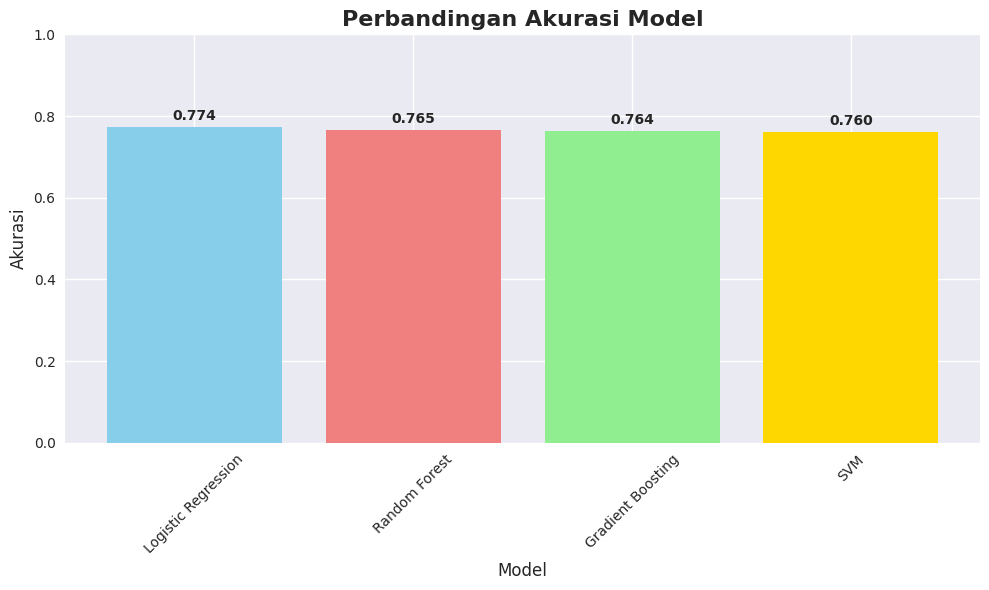


Model terbaik: Logistic Regression dengan akurasi: 0.7740


In [18]:
# Perbandingan semua model
print("\n" + "="*50)
print("PERBANDINGAN MODEL")
print("="*50)

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Akurasi'])
results_df = results_df.sort_values('Akurasi', ascending=False)
print(results_df)

# Visualisasi perbandingan model
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['Model'], results_df['Akurasi'], color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Perbandingan Akurasi Model', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Akurasi', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Tambahkan nilai akurasi di atas bar
for bar, accuracy in zip(bars, results_df['Akurasi']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Pilih model terbaik
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nModel terbaik: {best_model_name} dengan akurasi: {results_df.iloc[0]['Akurasi']:.4f}")

In [19]:
# Penyetelan hyperparameter untuk model terbaik
print(f"\n5. Penyetelan Hyperparameter untuk {best_model_name}...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    base_model = RandomForestClassifier(random_state=42, n_jobs=-1)
    X_tune_train, X_tune_test = X_train, X_test
    
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.1, 0.2],
        'max_depth': [3, 5]
    }
    base_model = GradientBoostingClassifier(random_state=42)
    X_tune_train, X_tune_test = X_train, X_test
    
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
    base_model = LogisticRegression(random_state=42, max_iter=1000)
    X_tune_train, X_tune_test = X_train_scaled, X_test_scaled
    
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    base_model = SVC(random_state=42, probability=True)
    X_tune_train, X_tune_test = X_train_scaled, X_test_scaled

# Grid search
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_tune_train, y_train)

print(f"Parameter terbaik: {grid_search.best_params_}")
print(f"Skor cross validation terbaik: {grid_search.best_score_:.4f}")

# Model akhir dengan parameter terbaik
final_model = grid_search.best_estimator_
final_pred = final_model.predict(X_tune_test)
final_accuracy = accuracy_score(y_test, final_pred)
print(f"Akurasi model akhir pada data uji: {final_accuracy:.4f}")


5. Penyetelan Hyperparameter untuk Logistic Regression...
Parameter terbaik: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Skor cross validation terbaik: 0.7576
Akurasi model akhir pada data uji: 0.7638


## Evaluasi Model

In [20]:
print("="*50)
print("EVALUASI MODEL")
print("="*50)

# 1. Classification Report
print("\n1. Classification Report:")
print(classification_report(y_test, final_pred, target_names=le_target.classes_))

EVALUASI MODEL

1. Classification Report:
              precision    recall  f1-score   support

     Dropout       0.80      0.78      0.79       284
    Enrolled       0.56      0.23      0.32       159
    Graduate       0.77      0.95      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.65      0.65       885
weighted avg       0.74      0.76      0.74       885




2. Confusion Matrix:
[[221  18  45]
 [ 43  36  80]
 [ 13  10 419]]


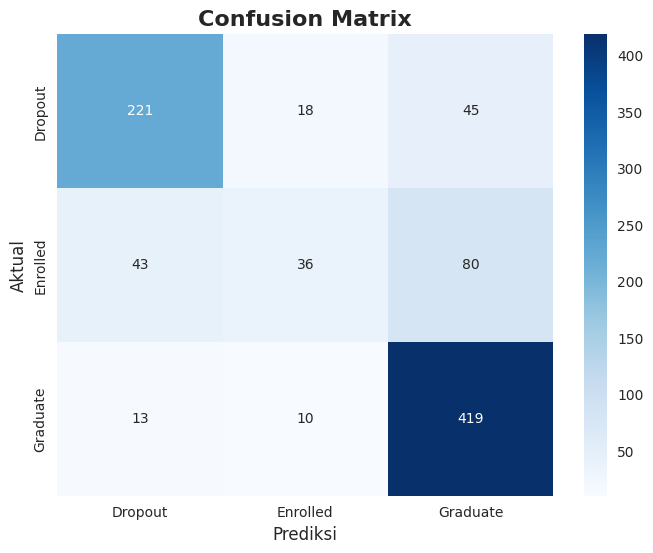

In [21]:
# 2. Confusion Matrix
print("\n2. Confusion Matrix:")
cm = confusion_matrix(y_test, final_pred)
print(cm)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_target.classes_, 
            yticklabels=le_target.classes_)
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.show()

In [22]:
# 3. Feature Importance (untuk tree-based model)
if hasattr(final_model, 'feature_importances_'):
    print("\n3. Feature Importance:")
    importance = final_model.feature_importances_
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': importance
    }).sort_values('importance', ascending=False)
    
    print(feature_importance.head(10))
    
    # Visualisasi pentingnya fitur
    plt.figure(figsize=(12, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10), palette='viridis')
    plt.title('10 Fitur Terpenting', fontsize=16, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()


4. Analisis Kurva ROC:


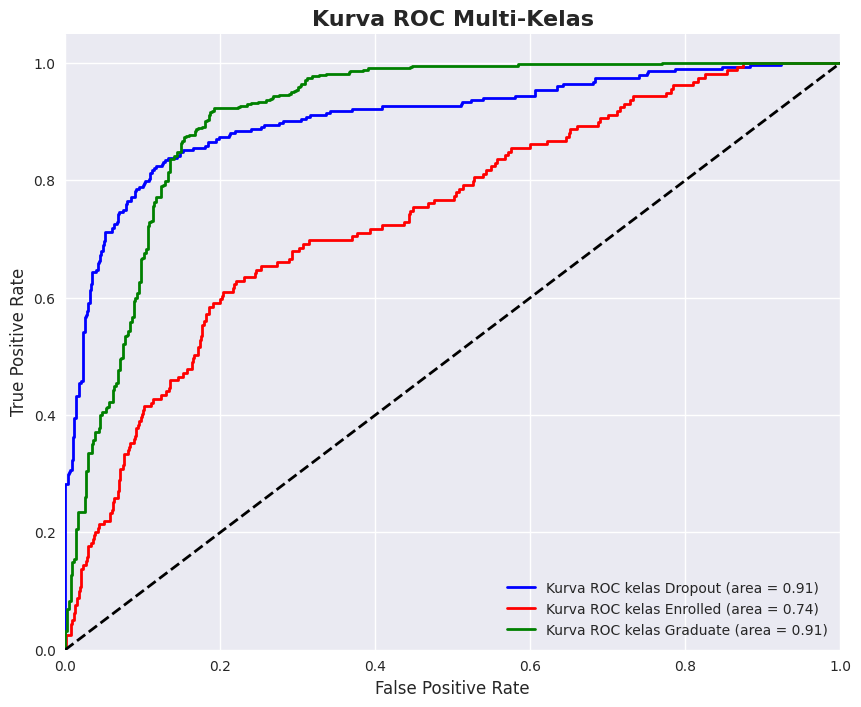

In [23]:
# 4. Kurva ROC (untuk klasifikasi multi-kelas)
if hasattr(final_model, 'predict_proba'):
    print("\n4. Analisis Kurva ROC:")
    
    # Probabilitas prediksi
    y_proba = final_model.predict_proba(X_tune_test)
    
    # Kurva ROC One-vs-Rest
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(len(le_target.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_proba[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_proba[:, i])
    
    # Plot kurva ROC
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(len(le_target.classes_)), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Kurva ROC kelas {0} (area = {1:0.2f})'
                 ''.format(le_target.classes_[i], roc_auc[i]))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Kurva ROC Multi-Kelas', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right")
    plt.show()

## Persiapan Model Deployment

In [24]:
print("="*50)
print("PERSIAPAN MODEL DEPLOYMENT")
print("="*50)

MODEL_PATH = "model/"

# Simpan model akhir
joblib.dump(final_model, MODEL_PATH+'model_status_mahasiswa.pkl')
print("- Model disimpan sebagai 'model_status_mahasiswa.pkl'")

# Simpan artefak preprocessing
joblib.dump(scaler, MODEL_PATH+'scaler.pkl')
joblib.dump(label_encoders, MODEL_PATH+'label_encoders.pkl')
joblib.dump(le_target, MODEL_PATH+'target_encoder.pkl')
joblib.dump(selected_features, MODEL_PATH+'selected_features.pkl')
print("- Artefak preprocessing disimpan")

PERSIAPAN MODEL DEPLOYMENT
- Model disimpan sebagai 'model_status_mahasiswa.pkl'
- Artefak preprocessing disimpan
